# This is the start of the complete unsupervised notebook with PID

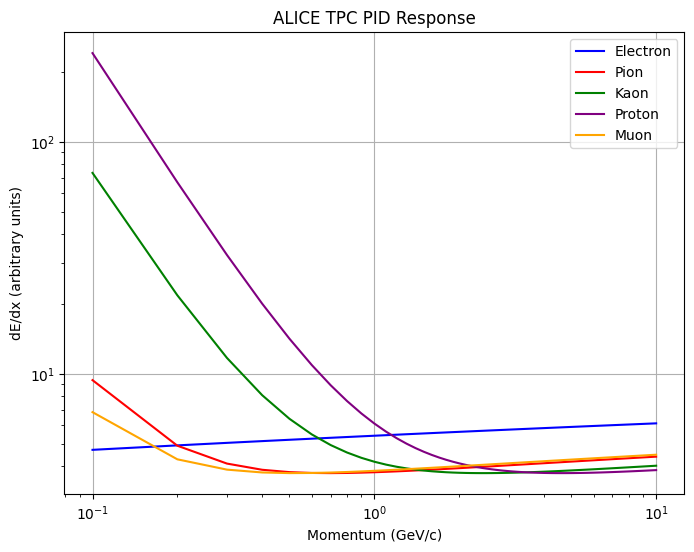

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def bethe_bloch(momentum, mass, charge=1):
    """
    Parametrizes the Bethe-Bloch formula for energy loss in the TPC.
    
    Parameters:
    - momentum: Particle momentum (GeV/c)
    - mass: Particle mass (GeV/c^2)
    - charge: Particle charge (default = 1)
    
    Returns:
    - dE/dx: Energy loss per unit distance (arbitrary units)
    """
    # Constants for Bethe-Bloch approximation
    K = 0.307075  # MeV mol^-1 cm^2
    Z = charge  # Particle charge
    I = 0.000016  # Mean excitation potential (MeV)
    m_e = 0.511  # Electron mass in MeV/c^2
    rho = 1  # Density of the material (relative to water, for simplicity)

    # Relativistic terms
    beta = momentum / np.sqrt(momentum**2 + mass**2)
    gamma = 1 / np.sqrt(1 - beta**2)
    
    # Bethe-Bloch equation (simplified)
    dEdx = (K * Z**2 * rho) / (beta**2) * (0.5 * np.log(2 * m_e * beta**2 * gamma**2 / I**2) - beta**2)
    
    return dEdx

def tpc_pid_response(momentum, particle_type):
    """
    Provides a parametrized TPC PID response for different particle types.
    
    Parameters:
    - momentum: Particle momentum (GeV/c)
    - particle_type: Type of particle ('electron', 'pion', 'kaon', 'proton')
    
    Returns:
    - dE/dx: TPC PID response (arbitrary units)
    """
    # Masses in GeV/c^2 for different particles
    mass_dict = {
        'electron': 0.000511,  # GeV/c^2
        'pion': 0.13957,       # GeV/c^2
        'kaon': 0.49367,       # GeV/c^2
        'proton': 0.93827,      # GeV/c^2
        'muon': 0.105658      # GeV/c^2
    }
    
    mass = mass_dict.get(particle_type, 0.13957)  # Default to pion mass if not found
    
    # Get the Bethe-Bloch dE/dx response
    dEdx = bethe_bloch(momentum, mass)
    
    return dEdx

# Example usage
momentum_range = np.linspace(0.1, 10, 100)  # Momentum range from 0.1 to 10 GeV/c

# Calculate responses for different particle species
electron_response = tpc_pid_response(momentum_range, 'electron')
pion_response = tpc_pid_response(momentum_range, 'pion')
kaon_response = tpc_pid_response(momentum_range, 'kaon')
proton_response = tpc_pid_response(momentum_range, 'proton')
muon_response = tpc_pid_response(momentum_range, 'muon')

# Plot the responses
plt.figure(figsize=(8, 6))
plt.plot(momentum_range, electron_response, label='Electron', color='blue')
plt.plot(momentum_range, pion_response, label='Pion', color='red')
plt.plot(momentum_range, kaon_response, label='Kaon', color='green')
plt.plot(momentum_range, proton_response, label='Proton', color='purple')
plt.plot(momentum_range, muon_response, label='Muon', color='orange')

plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.title('ALICE TPC PID Response')
plt.legend()
plt.grid(True)
plt.show()


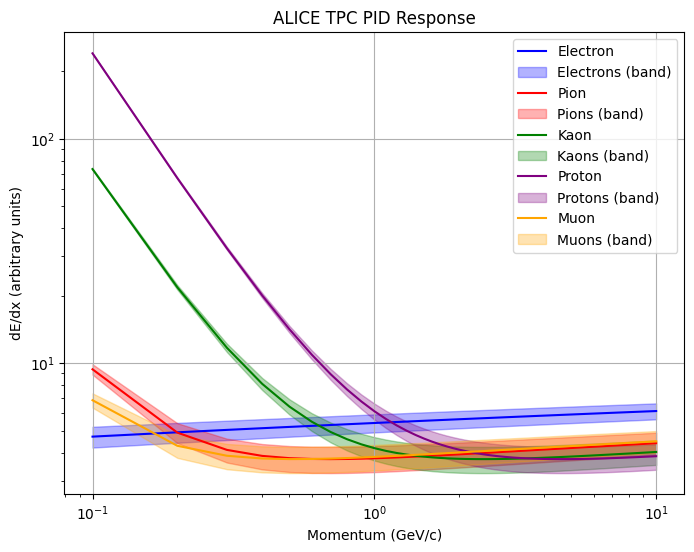

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def bethe_bloch(momentum, mass, charge=1):
    """
    Parametrizes the Bethe-Bloch formula for energy loss in the TPC.
    
    Parameters:
    - momentum: Particle momentum (GeV/c)
    - mass: Particle mass (GeV/c^2)
    - charge: Particle charge (default = 1)
    
    Returns:
    - dE/dx: Energy loss per unit distance (arbitrary units)
    """
    # Constants for Bethe-Bloch approximation
    K = 0.307075  # MeV mol^-1 cm^2
    Z = charge  # Particle charge
    I = 0.000016  # Mean excitation potential (MeV)
    m_e = 0.511  # Electron mass in MeV/c^2
    rho = 1  # Density of the material (relative to water, for simplicity)

    # Relativistic terms
    beta = momentum / np.sqrt(momentum**2 + mass**2)
    gamma = 1 / np.sqrt(1 - beta**2)
    
    # Bethe-Bloch equation (simplified)
    dEdx = (K * Z**2 * rho) / (beta**2) * (0.5 * np.log(2 * m_e * beta**2 * gamma**2 / I**2) - beta**2)
    
    return dEdx

# Function to define bands around a central line (mean response)
def calculate_bands(mean_response, sigma):
    """Calculate the upper and lower bands based on the mean response and Gaussian width."""
    upper_band = mean_response + sigma
    lower_band = mean_response - sigma
    return upper_band, lower_band

# Define Gaussian width (resolution) for banding around each particle's mean response
sigma_electrons = 0.50
sigma_muons = 0.50
sigma_pions = 0.50
sigma_kaons = 0.50
sigma_protons = 0.50

upper_electrons, lower_electrons = calculate_bands(electron_response, sigma_electrons)
upper_muons, lower_muons = calculate_bands(muon_response, sigma_muons)
upper_pions, lower_pions = calculate_bands(pion_response, sigma_pions)
upper_kaons, lower_kaons = calculate_bands(kaon_response, sigma_kaons)
upper_protons, lower_protons = calculate_bands(proton_response, sigma_protons)

def tpc_pid_response(momentum, particle_type):
    """
    Provides a parametrized TPC PID response for different particle types.
    
    Parameters:
    - momentum: Particle momentum (GeV/c)
    - particle_type: Type of particle ('electron', 'pion', 'kaon', 'proton')
    
    Returns:
    - dE/dx: TPC PID response (arbitrary units)
    """
    # Masses in GeV/c^2 for different particles
    mass_dict = {
        'electron': 0.000511,  # GeV/c^2
        'pion': 0.13957,       # GeV/c^2
        'kaon': 0.49367,       # GeV/c^2
        'proton': 0.93827,      # GeV/c^2
        'muon': 0.105658      # GeV/c^2
    }
    
    mass = mass_dict.get(particle_type, 0.13957)  # Default to pion mass if not found
    
    # Get the Bethe-Bloch dE/dx response
    dEdx = bethe_bloch(momentum, mass)
    
    return dEdx

# Example usage
momentum_range = np.linspace(0.1, 10, 100)  # Momentum range from 0.1 to 10 GeV/c

# Calculate responses for different particle species
electron_response = tpc_pid_response(momentum_range, 'electron')
pion_response = tpc_pid_response(momentum_range, 'pion')
kaon_response = tpc_pid_response(momentum_range, 'kaon')
proton_response = tpc_pid_response(momentum_range, 'proton')
muon_response = tpc_pid_response(momentum_range, 'muon')

# Plot the responses
plt.figure(figsize=(8, 6))
plt.plot(momentum_range, electron_response, label='Electron', color='blue')
plt.fill_between(momentum_range, lower_electrons, upper_electrons, color='blue', alpha=0.3, label='Electrons (band)')
plt.plot(momentum_range, pion_response, label='Pion', color='red')
plt.fill_between(momentum_range, lower_pions, upper_pions, color='red', alpha=0.3, label='Pions (band)')
plt.plot(momentum_range, kaon_response, label='Kaon', color='green')
plt.fill_between(momentum_range, lower_kaons, upper_kaons, color='green', alpha=0.3, label='Kaons (band)')
plt.plot(momentum_range, proton_response, label='Proton', color='purple')
plt.fill_between(momentum_range, lower_protons, upper_protons, color='purple', alpha=0.3, label='Protons (band)')
plt.plot(momentum_range, muon_response, label='Muon', color='orange')
plt.fill_between(momentum_range, lower_muons, upper_muons, color='orange', alpha=0.3, label='Muons (band)')

plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.title('ALICE TPC PID Response')
plt.legend()
plt.grid(True)
plt.show()


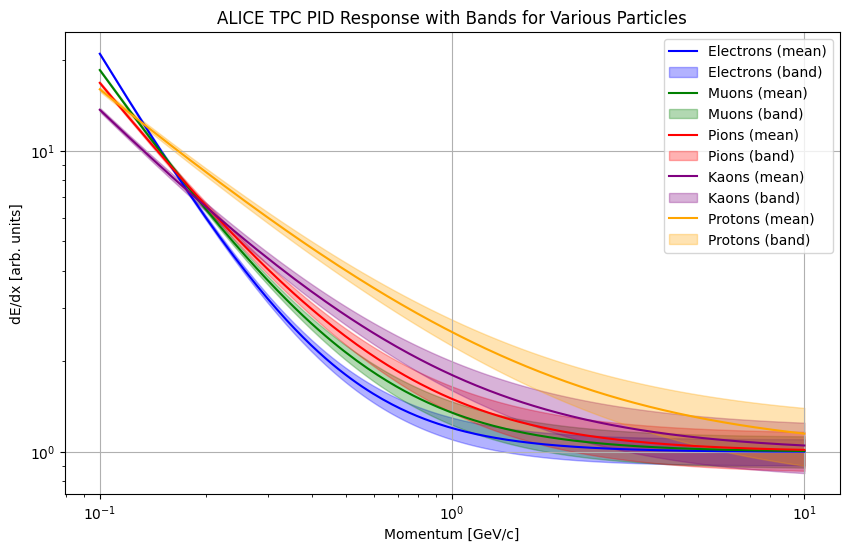

In [110]:

import numpy as np
import matplotlib.pyplot as plt

# Define a Bethe-Bloch-like function for parameterization of dE/dx response
def bethe_bloch(p, K, A, B, C):
    """Simplified Bethe-Bloch-like formula to parameterize dE/dx response."""
    return K * (A / p**B + C)

# Function to define bands around a central line (mean response)
def calculate_bands(mean_response, sigma):
    """Calculate the upper and lower bands based on the mean response and Gaussian width."""
    upper_band = mean_response + sigma
    lower_band = mean_response - sigma
    return upper_band, lower_band

# Create synthetic momentum data
momentum = np.linspace(0.1, 10, 500)

# Simulate dE/dx response for different particles using Bethe-Bloch-like formula
dedx_electrons = bethe_bloch(momentum, 1, 0.2, 2.0, 1)
dedx_muons = bethe_bloch(momentum, 1, 0.35, 1.7, 1)
dedx_pions = bethe_bloch(momentum, 1, 0.5, 1.5, 1)
dedx_kaons = bethe_bloch(momentum, 1, 0.8, 1.2, 1)
dedx_protons = bethe_bloch(momentum, 1, 1.5, 1.0, 1)

# Define Gaussian width (resolution) for banding around each particle's mean response
sigma_electrons = 0.1
sigma_muons = 0.12
sigma_pions = 0.15
sigma_kaons = 0.2
sigma_protons = 0.25

# Calculate upper and lower bands for each particle
upper_electrons, lower_electrons = calculate_bands(dedx_electrons, sigma_electrons)
upper_muons, lower_muons = calculate_bands(dedx_muons, sigma_muons)
upper_pions, lower_pions = calculate_bands(dedx_pions, sigma_pions)
upper_kaons, lower_kaons = calculate_bands(dedx_kaons, sigma_kaons)
upper_protons, lower_protons = calculate_bands(dedx_protons, sigma_protons)

# Plot the mean response with bands for each particle species
plt.figure(figsize=(10, 6))

# Electrons
plt.plot(momentum, dedx_electrons, label='Electrons (mean)', color='blue')
plt.fill_between(momentum, lower_electrons, upper_electrons, color='blue', alpha=0.3, label='Electrons (band)')

# Muons
plt.plot(momentum, dedx_muons, label='Muons (mean)', color='green')
plt.fill_between(momentum, lower_muons, upper_muons, color='green', alpha=0.3, label='Muons (band)')

# Pions
plt.plot(momentum, dedx_pions, label='Pions (mean)', color='red')
plt.fill_between(momentum, lower_pions, upper_pions, color='red', alpha=0.3, label='Pions (band)')

# Kaons
plt.plot(momentum, dedx_kaons, label='Kaons (mean)', color='purple')
plt.fill_between(momentum, lower_kaons, upper_kaons, color='purple', alpha=0.3, label='Kaons (band)')

# Protons
plt.plot(momentum, dedx_protons, label='Protons (mean)', color='orange')
plt.fill_between(momentum, lower_protons, upper_protons, color='orange', alpha=0.3, label='Protons (band)')

# Plot aesthetics
plt.xlabel('Momentum [GeV/c]')
plt.ylabel('dE/dx [arb. units]')
plt.title('ALICE TPC PID Response with Bands for Various Particles')
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.legend()
plt.grid(True)
plt.show()



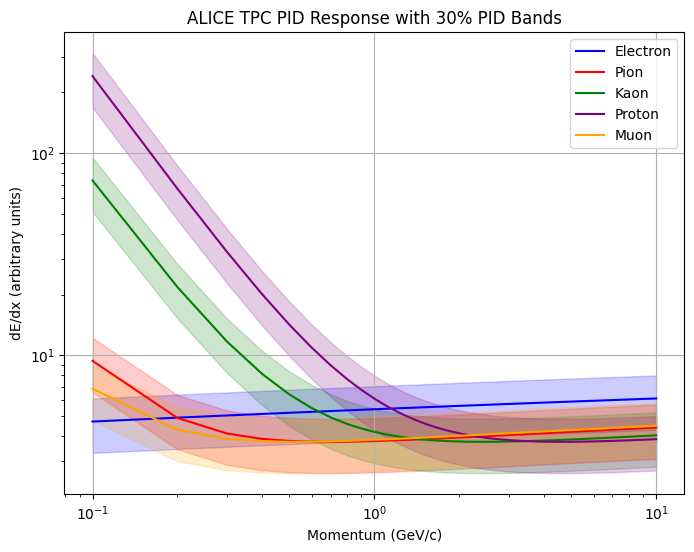

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def bethe_bloch(momentum, mass, charge=1):
    """
    Parametrizes the Bethe-Bloch formula for energy loss in the TPC.
    
    Parameters:
    - momentum: Particle momentum (GeV/c)
    - mass: Particle mass (GeV/c^2)
    - charge: Particle charge (default = 1)
    
    Returns:
    - dE/dx: Energy loss per unit distance (arbitrary units)
    """
    # Constants for Bethe-Bloch approximation
    K = 0.307075  # MeV mol^-1 cm^2
    Z = charge  # Particle charge
    I = 0.000016  # Mean excitation potential (MeV)
    m_e = 0.511  # Electron mass in MeV/c^2
    rho = 1  # Density of the material (relative to water, for simplicity)

    # Relativistic terms
    beta = momentum / np.sqrt(momentum**2 + mass**2)
    gamma = 1 / np.sqrt(1 - beta**2)
    
    # Bethe-Bloch equation (simplified)
    dEdx = (K * Z**2 * rho) / (beta**2) * (0.5 * np.log(2 * m_e * beta**2 * gamma**2 / I**2) - beta**2)
    
    return dEdx

def tpc_pid_response(momentum, particle_type):
    """
    Provides a parametrized TPC PID response for different particle types with a 30% PID band.
    
    Parameters:
    - momentum: Particle momentum (GeV/c)
    - particle_type: Type of particle ('electron', 'pion', 'kaon', 'proton')
    
    Returns:
    - dE/dx: TPC PID response (arbitrary units)
    - lower_band: Lower bound of PID band (70% of dE/dx)
    - upper_band: Upper bound of PID band (130% of dE/dx)
    """
    # Masses in GeV/c^2 for different particles
    mass_dict = {
        'electron': 0.000511,  # GeV/c^2
        'pion': 0.13957,       # GeV/c^2
        'kaon': 0.49367,       # GeV/c^2
        'proton': 0.93827,      # GeV/c^2
        'muon': 0.105658      # GeV/c^2 
    }
    
    mass = mass_dict.get(particle_type, 0.13957)  # Default to pion mass if not found
    
    # Get the Bethe-Bloch dE/dx response
    dEdx = bethe_bloch(momentum, mass)
    
    # Calculate the PID band (30% width)
    lower_band = dEdx * 0.7
    upper_band = dEdx * 1.3
    
    return dEdx, lower_band, upper_band

# Example usage
momentum_range = np.linspace(0.1, 10, 100)  # Momentum range from 0.1 to 10 GeV/c

# Calculate responses and PID bands for different particle species
electron_response, electron_lower, electron_upper = tpc_pid_response(momentum_range, 'electron')
pion_response, pion_lower, pion_upper = tpc_pid_response(momentum_range, 'pion')
kaon_response, kaon_lower, kaon_upper = tpc_pid_response(momentum_range, 'kaon')
proton_response, proton_lower, proton_upper = tpc_pid_response(momentum_range, 'proton')
muon_response, muon_lower, muon_upper = tpc_pid_response(momentum_range, 'muon')

# Plot the responses with PID bands
plt.figure(figsize=(8, 6))

# Electron
plt.plot(momentum_range, electron_response, label='Electron', color='blue')
plt.fill_between(momentum_range, electron_lower, electron_upper, color='blue', alpha=0.2)

# Pion
plt.plot(momentum_range, pion_response, label='Pion', color='red')
plt.fill_between(momentum_range, pion_lower, pion_upper, color='red', alpha=0.2)

# Kaon
plt.plot(momentum_range, kaon_response, label='Kaon', color='green')
plt.fill_between(momentum_range, kaon_lower, kaon_upper, color='green', alpha=0.2)

# Proton
plt.plot(momentum_range, proton_response, label='Proton', color='purple')
plt.fill_between(momentum_range, proton_lower, proton_upper, color='purple', alpha=0.2)

# Muons
plt.plot(momentum_range, muon_response, label='Muon', color='orange')
plt.fill_between(momentum_range, muon_lower, muon_upper, color='orange', alpha=0.2)

plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.title('ALICE TPC PID Response with 30% PID Bands')
plt.legend()
plt.grid(True)
plt.show()


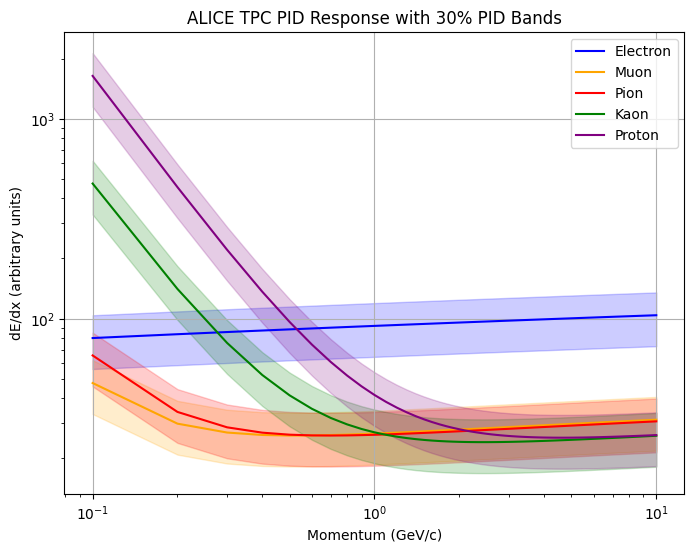

In [109]:
import numpy as np
import matplotlib.pyplot as plt

def bethe_bloch(momentum, mass, charge=1):
    """
    Parametrizes the Bethe-Bloch formula for energy loss in the TPC.
    
    Parameters:
    - momentum: Particle momentum (GeV/c)
    - mass: Particle mass (GeV/c^2)
    - charge: Particle charge (default = 1)
    
    Returns:
    - dE/dx: Energy loss per unit distance (arbitrary units)
    """
    # Constants for Bethe-Bloch approximation
    K = 0.307075  # MeV mol^-1 cm^2
    Z = charge  # Particle charge
    I = 0.000016  # Mean excitation potential (MeV)
    m_e = 0.511  # Electron mass in MeV/c^2
    rho = 1  # Density of the material (relative to water, for simplicity)

    # Relativistic terms
    beta = momentum / np.sqrt(momentum**2 + mass**2)
    gamma = 1 / np.sqrt(1 - beta**2)
    
    # Bethe-Bloch equation (simplified)
    dEdx = ((K * Z**2 * rho) / (beta**2) * (0.5 * np.log(2 * m_e * beta**2 * gamma**2 / I**2) - beta**2))*17
    
    return dEdx

def tpc_pid_response(momentum, particle_type, stretch_factor=1):
    """
    Provides a parametrized TPC PID response for different particle types with a 30% PID band.
    
    Parameters:
    - momentum: Particle momentum (GeV/c)
    - particle_type: Type of particle ('electron', 'muon', 'pion', 'kaon', 'proton')
    
    Returns:
    - dE/dx: TPC PID response (arbitrary units)
    - lower_band: Lower bound of PID band (70% of dE/dx)
    - upper_band: Upper bound of PID band (130% of dE/dx)
    """
    # Masses in GeV/c^2 for different particles
    mass_dict = {
        'electron': 0.000511,  # GeV/c^2
        'muon': 0.10566,       # GeV/c^2
        'pion': 0.13957,       # GeV/c^2
        'kaon': 0.49367,       # GeV/c^2
        'proton': 0.93827      # GeV/c^2
    }
    
    mass = mass_dict.get(particle_type, 0.13957)  # Default to pion mass if not found
    
    # Get the Bethe-Bloch dE/dx response
    dEdx = bethe_bloch(momentum, mass) * stretch_factor
    
    # Calculate the PID band (30% width)
    lower_band = dEdx * 0.7
    upper_band = dEdx * 1.3
    
    return dEdx, lower_band, upper_band

# Example usage
momentum_range = np.linspace(0.1, 10, 100)  # Momentum range from 0.1 to 10 GeV/c

#Shift momentum range
proton_momentum_shifted = momentum_range * .7

# Calculate responses and PID bands for different particle species
electron_response, electron_lower, electron_upper = tpc_pid_response(momentum_range, 'electron')
muon_response, muon_lower, muon_upper = tpc_pid_response(momentum_range, 'muon', stretch_factor=.41)
pion_response, pion_lower, pion_upper = tpc_pid_response(momentum_range, 'pion', stretch_factor=.41)
kaon_response, kaon_lower, kaon_upper = tpc_pid_response(momentum_range, 'kaon', stretch_factor=.38)
proton_response, proton_lower, proton_upper = tpc_pid_response(momentum_range, 'proton', stretch_factor=.4)

# Plot the responses with PID bands
plt.figure(figsize=(8, 6))

# Electron
plt.plot(momentum_range, electron_response, label='Electron', color='blue')
plt.fill_between(momentum_range, electron_lower, electron_upper, color='blue', alpha=0.2)

# Muon
plt.plot(momentum_range, muon_response, label='Muon', color='orange')
plt.fill_between(momentum_range, muon_lower, muon_upper, color='orange', alpha=0.2)

# Pion
plt.plot(momentum_range, pion_response, label='Pion', color='red')
plt.fill_between(momentum_range, pion_lower, pion_upper, color='red', alpha=0.2)

# Kaon
plt.plot(momentum_range, kaon_response, label='Kaon', color='green')
plt.fill_between(momentum_range, kaon_lower, kaon_upper, color='green', alpha=0.2)

# Proton
plt.plot(momentum_range, proton_response, label='Proton', color='purple')
plt.fill_between(momentum_range, proton_lower, proton_upper, color='purple', alpha=0.2)

plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.title('ALICE TPC PID Response with 30% PID Bands')
plt.legend()
plt.grid(True)
plt.show()


At momentum 1 GeV/c for Electron:
Maximum of error band: 119.6635
Minimum of error band: 64.4342
At momentum 1 GeV/c for Proton:
Maximum of error band: 54.0325
Minimum of error band: 29.0944
At momentum 1 GeV/c for Muon:
Maximum of error band: 34.6405
Minimum of error band: 18.6526
At momentum 1 GeV/c for Pion:
Maximum of error band: 34.1587
Minimum of error band: 18.3931
At momentum 1 GeV/c for Kaon:
Maximum of error band: 35.1380
Minimum of error band: 18.9205


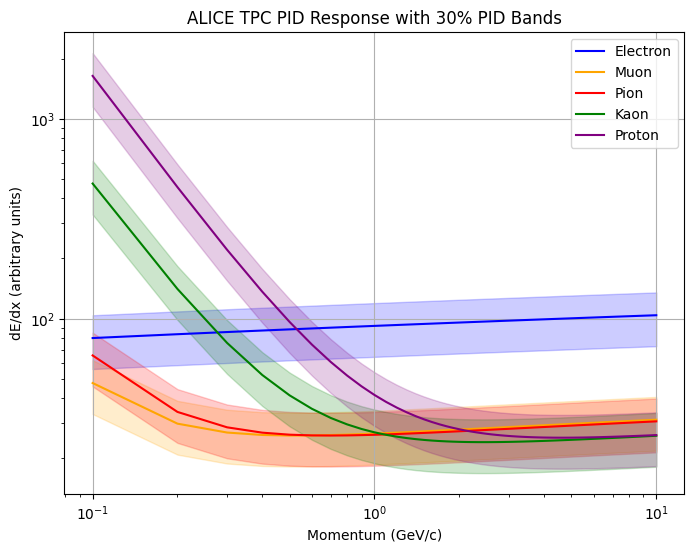

In [163]:
import numpy as np
import matplotlib.pyplot as plt

def bethe_bloch(momentum, mass, charge=1):
    """
    Parametrizes the Bethe-Bloch formula for energy loss in the TPC.
    
    Parameters:
    - momentum: Particle momentum (GeV/c)
    - mass: Particle mass (GeV/c^2)
    - charge: Particle charge (default = 1)
    
    Returns:
    - dE/dx: Energy loss per unit distance (arbitrary units)
    """
    # Constants for Bethe-Bloch approximation
    K = 0.307075  # MeV mol^-1 cm^2
    Z = charge  # Particle charge
    I = 0.000016  # Mean excitation potential (MeV)
    m_e = 0.511  # Electron mass in MeV/c^2
    rho = 1  # Density of the material (relative to water, for simplicity)

    # Relativistic terms
    beta = momentum / np.sqrt(momentum**2 + mass**2)
    gamma = 1 / np.sqrt(1 - beta**2)
    
    # Bethe-Bloch equation (simplified)
    dEdx = ((K * Z**2 * rho) / (beta**2) * (0.5 * np.log(2 * m_e * beta**2 * gamma**2 / I**2) - beta**2))*17
    
    return dEdx

def tpc_pid_response(momentum, particle_type, stretch_factor=1):
    """
    Provides a parametrized TPC PID response for different particle types with a 30% PID band.
    
    Parameters:
    - momentum: Particle momentum (GeV/c)
    - particle_type: Type of particle ('electron', 'muon', 'pion', 'kaon', 'proton')
    
    Returns:
    - dE/dx: TPC PID response (arbitrary units)
    - lower_band: Lower bound of PID band (70% of dE/dx)
    - upper_band: Upper bound of PID band (130% of dE/dx)
    """
    # Masses in GeV/c^2 for different particles
    mass_dict = {
        'electron': 0.000511,  # GeV/c^2
        'muon': 0.10566,       # GeV/c^2
        'pion': 0.13957,       # GeV/c^2
        'kaon': 0.49367,       # GeV/c^2
        'proton': 0.93827      # GeV/c^2
    }
    
    mass = mass_dict.get(particle_type, 0.13957)  # Default to pion mass if not found
    
    # Get the Bethe-Bloch dE/dx response
    dEdx = bethe_bloch(momentum, mass) * stretch_factor
    
    # Calculate the PID band (30% width)
    lower_band = dEdx * 0.7
    upper_band = dEdx * 1.3
    
    return dEdx, lower_band, upper_band

#def find_error_band_extremes(momentum, particle_type, stretch_factor):
    _, lower_band, upper_band = tpc_pid_response(momentum, particle_type, stretch_factor)
    max_error_band = upper_band
    min_error_band = lower_band
    
    return max_error_band, min_error_band

# Example usage to find the error band extremes
#momentum_value = 3  # Example momentum value in GeV/c
#particle = 'kaon'  # Particle type

#max_band, min_band = find_error_band_extremes(momentum_value, particle, stretch_factor=1)
#print(f"At momentum {momentum_value} GeV/c for {particle}:")
#print(f"Maximum of error band: {max_band:.4f}")
#print(f"Minimum of error band: {min_band:.4f}")

momentum_value = 1  # Example momentum value in GeV/c

#Max and min values for electron
def error_extremes_electron(momentum):
    _, lower_band, upper_band = tpc_pid_response(momentum, 'electron', stretch_factor=1)
    max_error_band_e = upper_band
    min_error_band_e = lower_band

    return max_error_band_e, min_error_band_e

max_band_e, min_band_e = error_extremes_electron(momentum_value)
print(f"At momentum {momentum_value} GeV/c for Electron:")
print(f"Maximum of error band: {max_band_e:.4f}")
print(f"Minimum of error band: {min_band_e:.4f}")

#Max and min values for proton
def error_extremes_proton(momentum):
    _, lower_band, upper_band = tpc_pid_response(momentum, 'proton', stretch_factor=.4)
    max_error_band_p = upper_band
    min_error_band_p = lower_band

    return max_error_band_p, min_error_band_p

max_band_p, min_band_p = error_extremes_proton(momentum_value)
print(f"At momentum {momentum_value} GeV/c for Proton:")
print(f"Maximum of error band: {max_band_p:.4f}")
print(f"Minimum of error band: {min_band_p:.4f}")

#Max and min values for muon
def error_extremes_muon(momentum):
    _, lower_band, upper_band = tpc_pid_response(momentum, 'muon', stretch_factor=.41)
    max_error_band_m = upper_band
    min_error_band_m = lower_band

    return max_error_band_m, min_error_band_m

max_band_m, min_band_m = error_extremes_muon(momentum_value)
print(f"At momentum {momentum_value} GeV/c for Muon:")
print(f"Maximum of error band: {max_band_m:.4f}")
print(f"Minimum of error band: {min_band_m:.4f}")

#Max and min values for pion
def error_extremes_pion(momentum):
    _, lower_band, upper_band = tpc_pid_response(momentum, 'pion', stretch_factor=.41)
    max_error_band_pi = upper_band
    min_error_band_pi = lower_band

    return max_error_band_pi, min_error_band_pi

max_band_pi, min_band_pi = error_extremes_pion(momentum_value)
print(f"At momentum {momentum_value} GeV/c for Pion:")
print(f"Maximum of error band: {max_band_pi:.4f}")
print(f"Minimum of error band: {min_band_pi:.4f}")

#Max and min values for kaon
def error_extremes_pion(momentum):
    _, lower_band, upper_band = tpc_pid_response(momentum, 'kaon', stretch_factor=.38)
    max_error_band_k = upper_band
    min_error_band_k = lower_band

    return max_error_band_k, min_error_band_k

max_band_k, min_band_k = error_extremes_pion(momentum_value)
print(f"At momentum {momentum_value} GeV/c for Kaon:")
print(f"Maximum of error band: {max_band_k:.4f}")
print(f"Minimum of error band: {min_band_k:.4f}")

# Example usage
momentum_range = np.linspace(0.1, 10, 100)  # Momentum range from 0.1 to 10 GeV/c

# Calculate responses and PID bands for different particle species
electron_response, electron_lower, electron_upper = tpc_pid_response(momentum_range, 'electron')
muon_response, muon_lower, muon_upper = tpc_pid_response(momentum_range, 'muon', stretch_factor=.41)
pion_response, pion_lower, pion_upper = tpc_pid_response(momentum_range, 'pion', stretch_factor=.41)
kaon_response, kaon_lower, kaon_upper = tpc_pid_response(momentum_range, 'kaon', stretch_factor=.38)
proton_response, proton_lower, proton_upper = tpc_pid_response(momentum_range, 'proton', stretch_factor=.4)

# Plot the responses with PID bands
plt.figure(figsize=(8, 6))

# Electron
plt.plot(momentum_range, electron_response, label='Electron', color='blue')
plt.fill_between(momentum_range, electron_lower, electron_upper, color='blue', alpha=0.2)

# Muon
plt.plot(momentum_range, muon_response, label='Muon', color='orange')
plt.fill_between(momentum_range, muon_lower, muon_upper, color='orange', alpha=0.2)

# Pion
plt.plot(momentum_range, pion_response, label='Pion', color='red')
plt.fill_between(momentum_range, pion_lower, pion_upper, color='red', alpha=0.2)

# Kaon
plt.plot(momentum_range, kaon_response, label='Kaon', color='green')
plt.fill_between(momentum_range, kaon_lower, kaon_upper, color='green', alpha=0.2)

# Proton
plt.plot(momentum_range, proton_response, label='Proton', color='purple')
plt.fill_between(momentum_range, proton_lower, proton_upper, color='purple', alpha=0.2)


plt.xlabel('Momentum (GeV/c)')
plt.ylabel('dE/dx (arbitrary units)')
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.title('ALICE TPC PID Response with 30% PID Bands')
plt.legend()
plt.grid(True)
plt.show()


In [161]:
def calculate_nsigma(momentum, dEdx_observed, stretch_factors=None, error_fraction=0.3):
    """
    Calculates the nSigma value for each particle type based on observed dE/dx.
    
    Parameters:
    - momentum: Particle momentum (GeV/c)
    - dEdx_observed: Observed dE/dx value (arbitrary units)
    - stretch_factors: Dictionary of stretch factors for each particle type (default is 1.0 for all)
    - error_fraction: Fraction of error to use for standard deviation (default 0.3 or 30%)
    
    Returns:
    - nsigma_dict: Dictionary containing nSigma values for each particle type
    """
    if stretch_factors is None:
        stretch_factors = {
            'electron': 1.0,
            'muon': 1.0,
            'pion': 1.0,
            'kaon': 1.0,
            'proton': 1.0
        }
    
    particle_types = ['electron', 'muon', 'pion', 'kaon', 'proton']
    nsigma_dict = {}

    for particle in particle_types:
        stretch_factor = stretch_factors.get(particle, 1.0)
        dEdx_expected, _, _ = tpc_pid_response(momentum, particle, stretch_factor)
        sigma = dEdx_expected * error_fraction  # Standard deviation as a fraction of the expected dE/dx
        nsigma = (dEdx_observed - dEdx_expected) / sigma
        nsigma_dict[particle] = nsigma
    
    return nsigma_dict

# Example usage to calculate nSigma values
momentum_value1 = 4  # Example momentum in GeV/c
dEdx_observed = 100  # Example observed dE/dx value (arbitrary units)

# Define custom stretch factors
stretch_factors = {
    'electron': 1.0,
    'muon': .41,
    'pion': .41,
    'kaon': .38,
    'proton': .4
}

nsigma_values = calculate_nsigma(momentum_value1, dEdx_observed, stretch_factors)
print(f"nSigma values at momentum {momentum_value1} GeV/c and observed dE/dx {dEdx_observed}:")
for particle, nsigma in nsigma_values.items():
    print(f"{particle}: {nsigma:.2f}")

nSigma values at momentum 4 GeV/c and observed dE/dx 100:
electron: 0.02
muon: 8.04
pion: 8.27
kaon: 10.28
proton: 9.76
